## Load Data

In [ ]:
# !pip install roboflow
# !pip install ultralytics
# !pip install opencv-python

from roboflow import Roboflow
rf = Roboflow(api_key="1joMy7dDW6A0BS57ippH")
project = rf.workspace("yami-dzhfx").project("construction-safety-dataset-t5g15")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-Safety-Dataset-1 in yolov11:: 100%|██████████| 4560/4560 [00:00<00:00, 6459.64it/s]


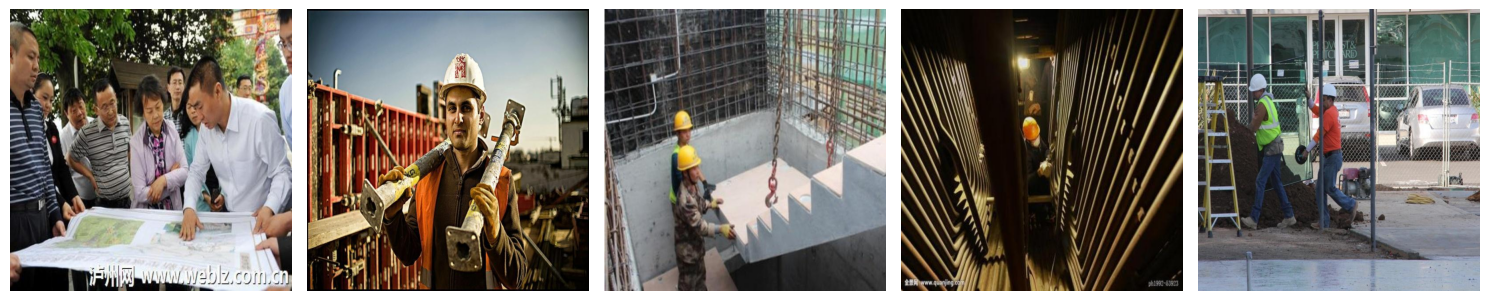

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

test_image_path = '/content/Construction-Safety-Dataset-1/test/images'
test_images = os.listdir(test_image_path)

# Display the first 5 images in one figure
num_images_to_display = min(5, len(test_images))
plt.figure(figsize=(15, 5)) # Adjust figure size as needed

for i in range(num_images_to_display):
    img_path = os.path.join(test_image_path, test_images[i])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

## Transfer Learning

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

results = model.train(
    data='/content/Construction-Safety-Dataset-1/data.yaml',
    epochs=30,
    batch=16,
    imgsz=640,
    device=0,
    pretrained=True,
    freeze=23
)

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = model.val()

print(metrics.box.map)    # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1473.2±502.4 MB/s, size: 63.2 KB)
val: Scanning /content/Construction-Safety-Dataset-1/valid/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 426/426 555.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 4.4it/s 6.2s
                   all        426       2180      0.785      0.733      0.802      0.458
                helmet        342        622        0.9      0.831      0.907      0.593
             no-helmet        147        476      0.805      0.842      0.883      0.532
               no-vest        202        580      0.734      0.605      0.714      0.312
                  vest        289        502        0.7      0.655      0.703      0.394
Speed: 1.8ms preprocess

## Fine Tunning

In [ ]:
model2 = YOLO("yolo11n.pt")

results = model2.train(
    data='/content/Construction-Safety-Dataset-1/data.yaml',
    epochs=30,
    batch=16,
    imgsz=640,
    device=0,
    pretrained=True,
    freeze=13
)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Construction-Safety-Dataset-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=13, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

In [ ]:
metrics = model2.val()

print(metrics.box.map)    # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1937.0±684.0 MB/s, size: 60.5 KB)
val: Scanning /content/Construction-Safety-Dataset-1/valid/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 426/426 878.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 4.3it/s 6.3s
                   all        426       2180      0.919      0.849      0.908      0.579
                helmet        342        622      0.956      0.908      0.955      0.689
             no-helmet        147        476       0.93       0.88      0.932      0.585
               no-vest        202        580      0.877      0.762      0.838      0.392
                  vest        289        502      0.912      0.845      0.907      0.648
Speed: 2.1ms preprocess

## Still Underfirtting After Fine Tunning

In [ ]:
model3 = YOLO("yolo11n.pt")

results = model3.train(
    data='/content/Construction-Safety-Dataset-1/data.yaml',
    epochs=50,
    batch=16,
    imgsz=800,
    device=0,
    pretrained=True,
    freeze=0,
    lr0=0.001
)

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Construction-Safety-Dataset-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

In [ ]:
metrics = model3.val()

print(metrics.box.map)    # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 921.2±523.8 MB/s, size: 60.5 KB)
val: Scanning /content/Construction-Safety-Dataset-1/valid/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 426/426 257.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 3.2it/s 8.4s
                   all        426       2180      0.923      0.875       0.92      0.592
                helmet        342        622      0.965      0.933      0.962      0.711
             no-helmet        147        476      0.946      0.881       0.94      0.601
               no-vest        202        580      0.883      0.792      0.848      0.395
                  vest        289        502        0.9      0.892       0.93      0.661
Speed: 3.2ms preprocess,

## Try Larger Model

In [3]:
from ultralytics import YOLO

model4 = YOLO("yolo11m.pt")

results = model4.train(
    data='/content/Construction-Safety-Dataset-1/data.yaml',
    epochs=30,
    batch=16,
    imgsz=800,
    device=0,
    pretrained=True,
    freeze=10,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Construction-Safety-Dataset-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, i

In [4]:
metrics = model4.val()

print(metrics.box.map)    # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1396.9±324.4 MB/s, size: 63.2 KB)
val: Scanning /content/Construction-Safety-Dataset-1/valid/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 426/426 369.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 1.2it/s 23.0s
                   all        426       2180       0.92      0.873      0.924      0.604
                helmet        342        622      0.961      0.915      0.963      0.716
             no-helmet        147        476       0.93      0.899      0.943      0.613
               no-vest        202        580      0.882        0.8      0.869      0.417
                  vest        289        502      0.906      0.879      0.921      0.671
Speed: 3.3ms preproc

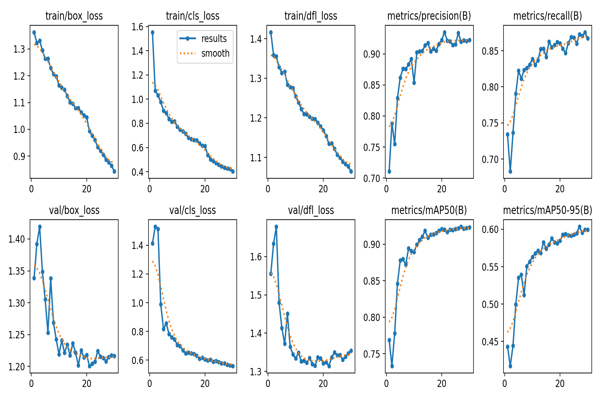

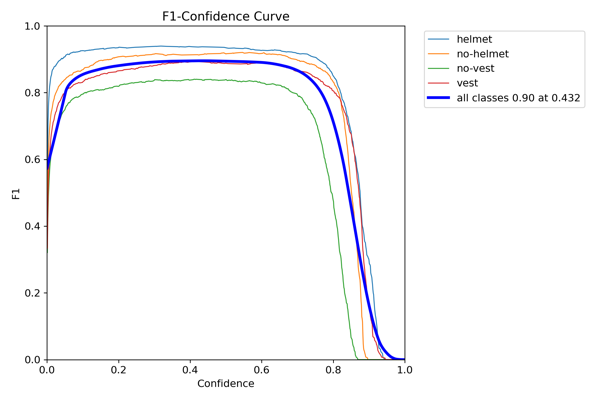

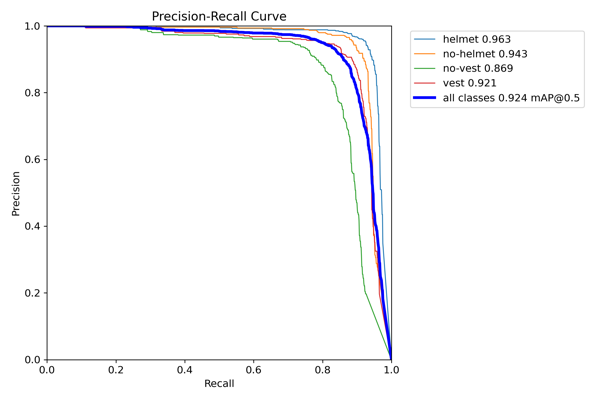

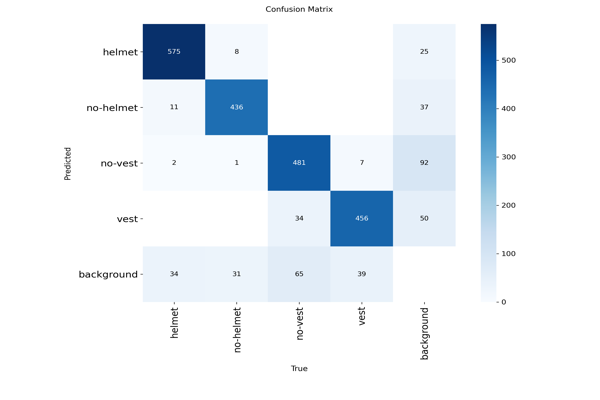

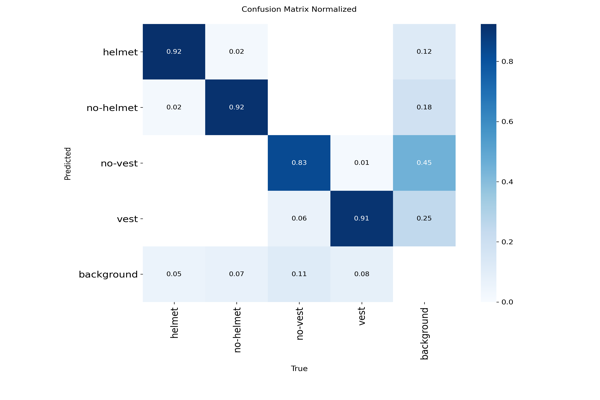

In [10]:
from PIL import Image

# Specify the path to your image file
images_path = [
    "/content/runs/detect/train/results.png",
    "/content/runs/detect/val/BoxF1_curve.png",
    "/content/runs/detect/val/BoxPR_curve.png",
    "/content/runs/detect/val/confusion_matrix.png",
    "/content/runs/detect/val/confusion_matrix_normalized.png",
]

# Open and display the image
for image in images_path:
  try:
      img = Image.open(image)
      display(img.resize((600, 400)))
  except FileNotFoundError:
      print(f"Error: Image file not found at {image}")

## Test Performance

In [16]:
metrics = model4.val(data="/content/Construction-Safety-Dataset-1/data.yaml", split="test")

print(metrics.box.map)         # mAP50-95
print(metrics.box.map50)       # mAP50
print(metrics.box.map75)       # mAP75

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1627.8±495.9 MB/s, size: 51.4 KB)
val: Scanning /content/Construction-Safety-Dataset-1/test/labels.cache... 255 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 255/255 473.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 1.1it/s 14.8s
                   all        255       1343      0.928      0.919      0.947      0.605
                helmet        187        352      0.962      0.942      0.964      0.686
             no-helmet        102        336      0.918      0.938      0.957      0.639
               no-vest        113        374      0.901      0.849        0.9      0.412
                  vest        174        281      0.933      0.947      0.965      0.683
Speed: 7.0ms preprocess, 40.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /conte


0: 800x800 1 helmet, 1 vest, 40.5ms
1: 800x800 35 helmets, 24 vests, 40.5ms
2: 800x800 2 helmets, 1 no-vest, 1 vest, 40.5ms
3: 800x800 1 helmet, 1 vest, 40.5ms
4: 800x800 3 helmets, 1 no-vest, 3 vests, 40.5ms
5: 800x800 1 helmet, 1 no-vest, 40.5ms
6: 800x800 2 helmets, 1 no-vest, 1 vest, 40.5ms
7: 800x800 3 helmets, 3 no-helmets, 5 no-vests, 40.5ms
8: 800x800 1 helmet, 3 no-helmets, 3 no-vests, 1 vest, 40.5ms
9: 800x800 3 helmets, 2 no-helmets, 5 no-vests, 40.5ms


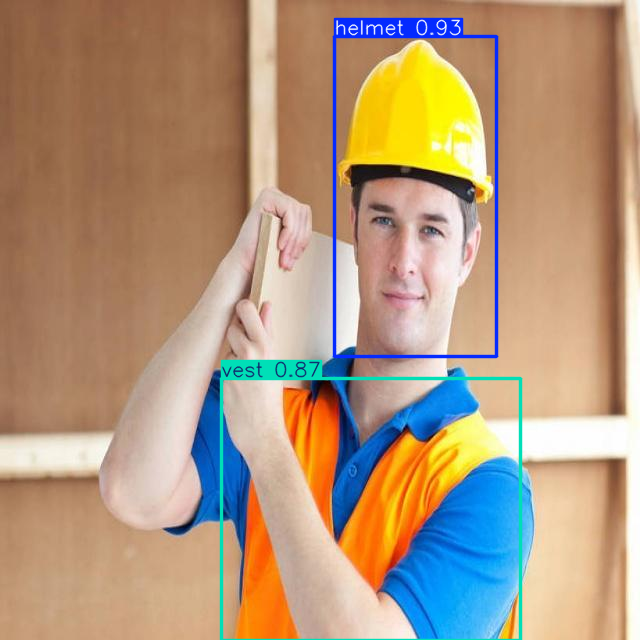

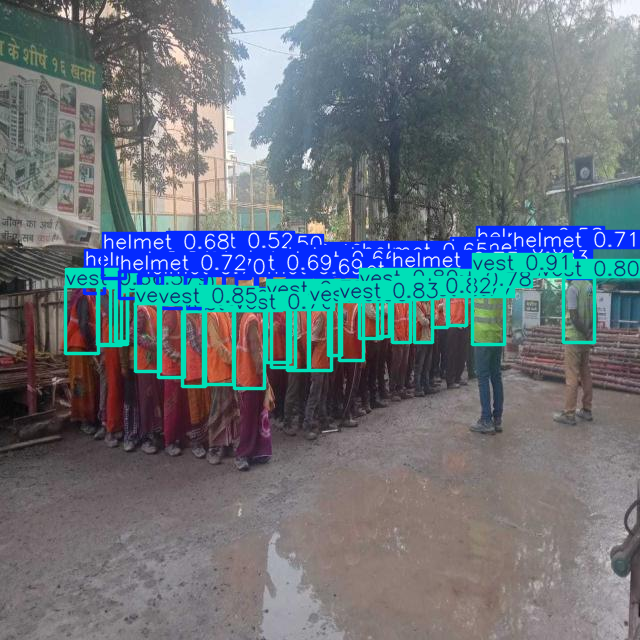

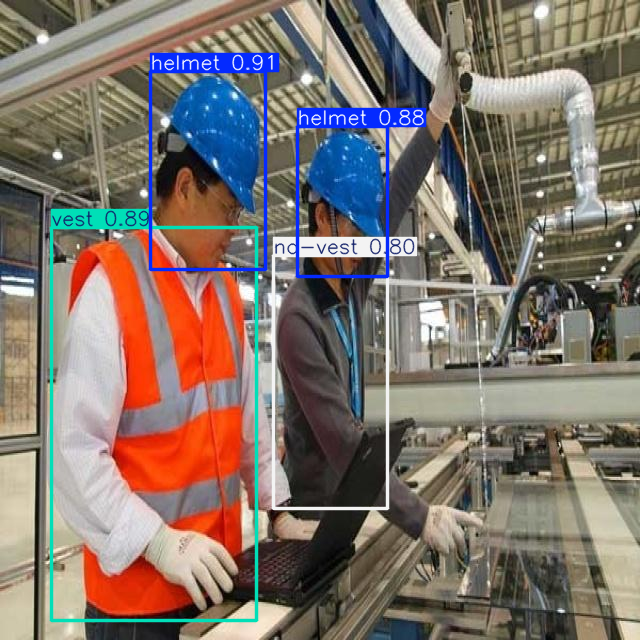

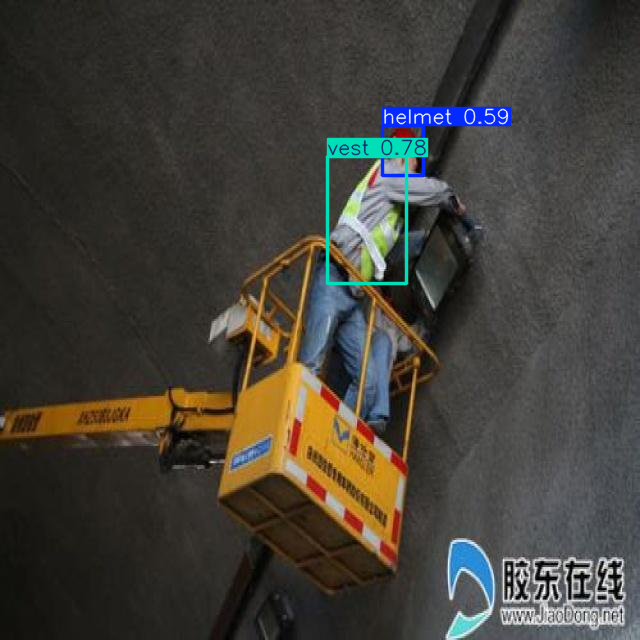

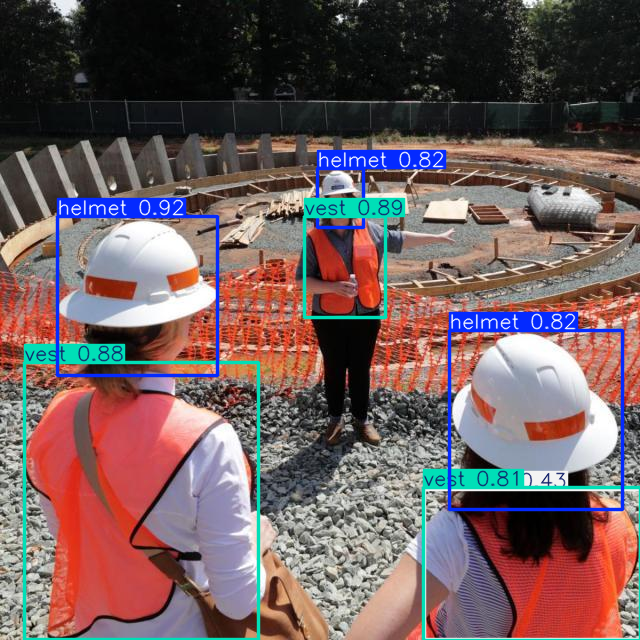

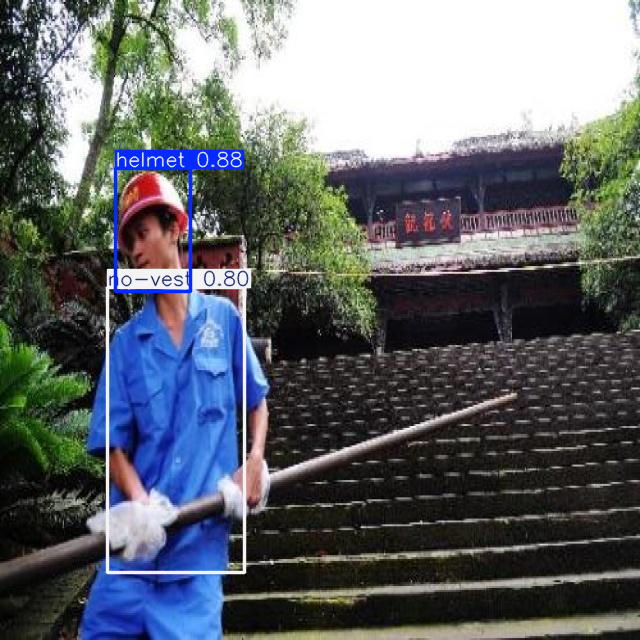

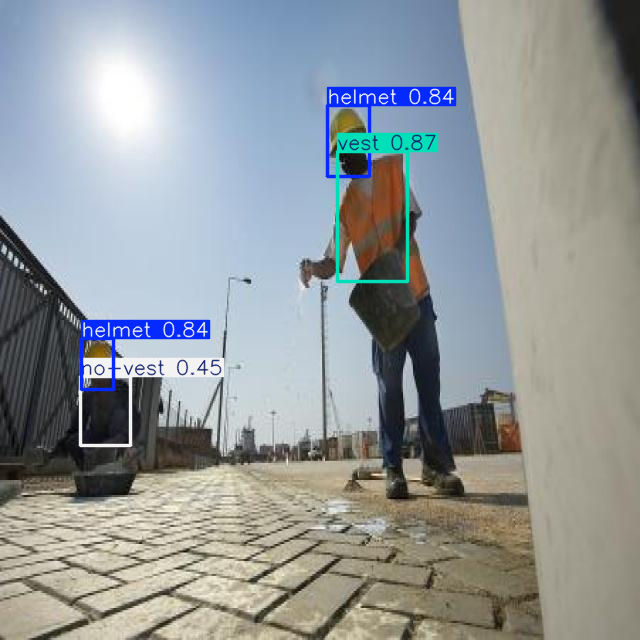

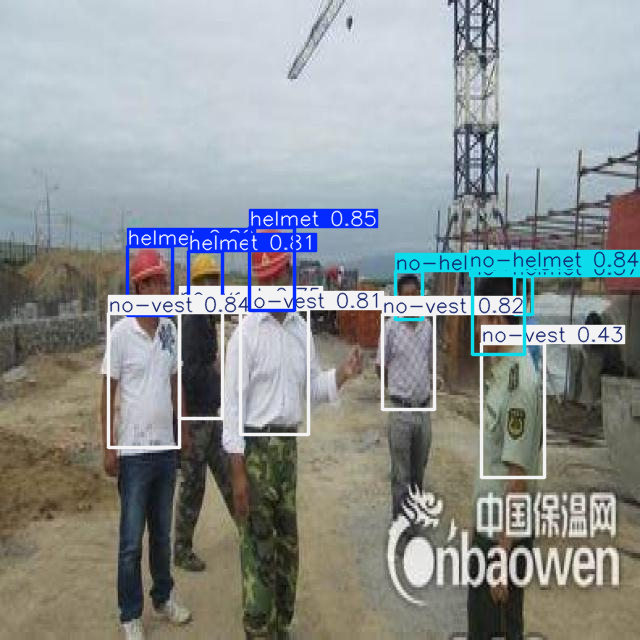

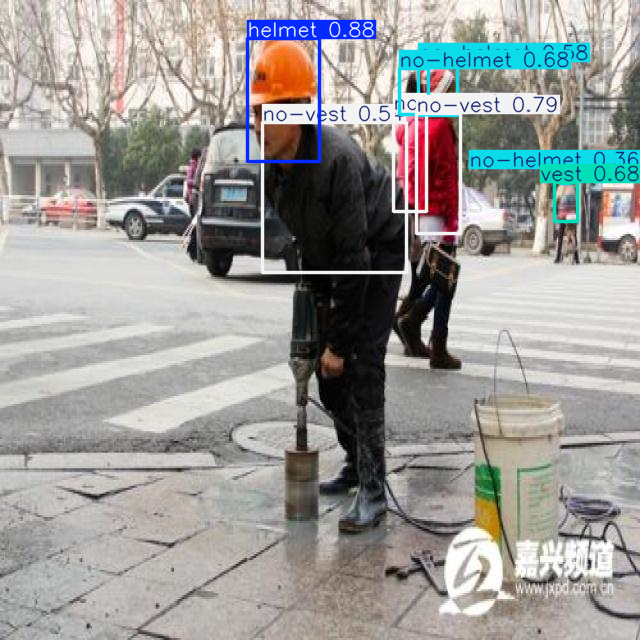

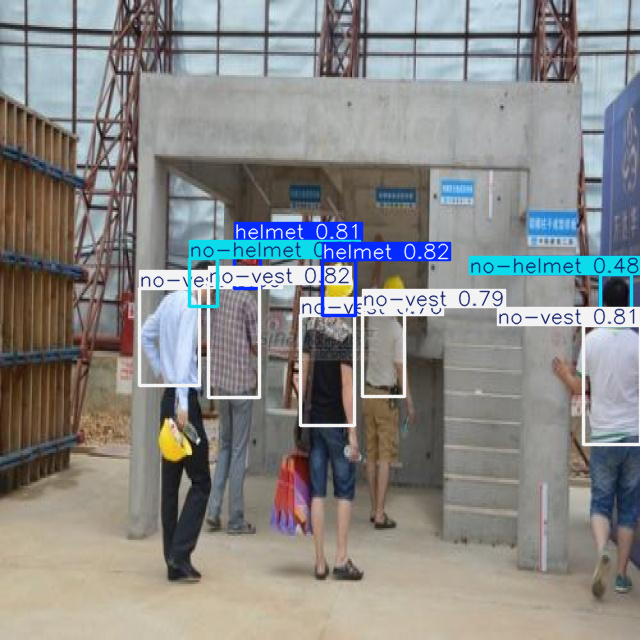

Speed: 4.1ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 800)


In [17]:
# Run batched inference on a list of images
from ultralytics import YOLO

model4 = YOLO('/content/runs/detect/train/weights/best.pt')

test_sample = [os.path.join(test_image_path, i) for i in test_images[-10:]]

results = model4(test_sample, stream=True)  # return a generator of Results objects

# Process results generator
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen

## Save the model

In [ ]:
model4.export(format="onnx")

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 8, 13125) (38.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 12.2s, saved as '/content/best.onnx' (76.8 MB)

Export complete (15.9s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=800  
Validate:        yolo val task=detect model=/content/best.onnx imgsz=800 data=/content/Constructi

'/content/best.onnx'

## Streamlit App

In [ ]:
# # %%writefile fifa_app.py
# import streamlit as st
# import cv2
# import tempfile
# import numpy as np
# from ultralytics import YOLO
# from PIL import Image
# import os
# from streamlit_webrtc import webrtc_streamer, VideoTransformerBase


# # ----------------------------------------------
# # 🧠 App Configuration
# # ----------------------------------------------
# st.set_page_config(page_title="YOLO Object Detection", layout="wide")
# st.title("🎯 YOLO Object Detection App")
# st.markdown("Upload an image, video, or use webcam for detection using YOLO.")

# # ----------------------------------------------
# # ⚙️ Sidebar Configuration
# # ----------------------------------------------
# st.sidebar.header("⚙️ Settings")
# confidence = st.sidebar.slider("Confidence Threshold", 0.1, 1.0, 0.5, 0.05)

# # ----------------------------------------------
# # 🧩 Load Model
# # ----------------------------------------------
# @st.cache_resource
# def load_model():
#     model = YOLO("best.onnx")  # replace with your trained model
#     return model

# model = load_model()

# # ----------------------------------------------
# # 🎛️ Mode Selection
# # ----------------------------------------------
# st.sidebar.subheader("📷 Select Input Source")
# mode = st.sidebar.radio("Choose Input Type", ["Image", "Video", "Webcam"])

# # ----------------------------------------------
# # 📸 Image Mode
# # ----------------------------------------------
# if mode == "Image":
#     uploaded_image = st.file_uploader("📂 Upload an image", type=["jpg", "jpeg", "png"])
#     if uploaded_image is not None:
#         image = Image.open(uploaded_image)
#         img_np = np.array(image)

#         # Inference (detection only)
#         results = model(img_np, conf=confidence)
#         annotated = results[0].plot()

#         st.image(annotated, caption="🔍 Detection Result", use_column_width=True)

# # ----------------------------------------------
# # 🎥 Video Mode (silent processing)
# # ----------------------------------------------
# elif mode == "Video":
#     uploaded_video = st.file_uploader("📹 Upload a video", type=["mp4", "mov", "avi", "mkv"])

#     if uploaded_video:
#         st.info("📥 Saving and processing your video... Please wait.")
#         tfile = tempfile.NamedTemporaryFile(delete=False)
#         tfile.write(uploaded_video.read())

#         cap = cv2.VideoCapture(tfile.name)

#         if not cap.isOpened():
#             st.error("❌ Unable to open the uploaded video.")
#             st.stop()

#         fps = cap.get(cv2.CAP_PROP_FPS) or 25
#         width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#         height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#         total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#         output_path = "output_detected.mp4"
#         out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

#         progress = st.progress(0)
#         frame_i = 0

#         while True:
#             ret, frame = cap.read()
#             if not ret:
#                 break

#             # 🔹 Detection only
#             results = model(frame, conf=confidence)
#             annotated_frame = results[0].plot()

#             out.write(annotated_frame)

#             frame_i += 1
#             if total_frames > 0:
#                 progress.progress(min(frame_i / total_frames, 1.0))

#         cap.release()
#         out.release()

#         st.success("✅ Video processed successfully!")

#         # ----------------------------------------------
#         # 💾 Download Processed Video
#         # ----------------------------------------------
#         with open(output_path, "rb") as f:
#             video_bytes = f.read()

#         st.download_button(
#             label="⬇️ Download Detected Video",
#             data=video_bytes,
#             file_name="detected_output.mp4",
#             mime="video/mp4"
#         )

# # ----------------------------------------------
# # 🧍 Webcam Mode (Real-Time Detection)
# # ----------------------------------------------
# elif mode == "Webcam":
#     st.markdown("🎥 **Webcam mode active — Real-time YOLO detection. Press Stop to end.**")

#     class YOLODetectionTransformer(VideoTransformerBase):

#         def transform(self, frame):
#             img = frame.to_ndarray(format="bgr24")
#             results = model(img, conf=confidence)
#             return results[0].plot()

#     webrtc_streamer(
#         key="yolo-webcam-detector",
#         video_transformer_factory=YOLODetectionTransformer,
#         media_stream_constraints={"video": True, "audio": False},
#     )
